In [49]:
import pandas as pd
import os


DATA_DIR = '/home/jinsoo/KAGGLE/SPEECH_RECOGNITION/github/kaggle_tf_audio/model/'
file_list = os.listdir(DATA_DIR)
csv_list = []
for index in file_list:
    if ('result.csv' in index):
        csv_list.append(index)

print (csv_list)
#csv_list.remove('go_result.csv')
#csv_df = pd.dataframe()
#csv_df = pd.Dataframe(columns = ['test'])
df = pd.read_csv(csv_list[0])
for index in csv_list:
    df_new = pd.read_csv(index)
    df_new.columns = ['fname',index]
    df = pd.merge(df,df_new, on = 'fname')   
df.drop(df.columns[1], axis=1, inplace = True) 
print (df)

['right_result.csv', 'no_result.csv', 'left_result.csv', 'yes_result.csv', 'go_result.csv', 'up_result.csv', 'stop_result.csv', 'down_result.csv', 'off_result.csv', 'on_result.csv']
                     fname right_result.csv no_result.csv left_result.csv  \
0       clip_257fcb6fe.wav          unknown       unknown         unknown   
1       clip_76430a9ea.wav          unknown       unknown            left   
2       clip_3032a55d0.wav          unknown            no         unknown   
3       clip_cde82e29a.wav          silence       silence         silence   
4       clip_90f3f424a.wav          silence       silence         silence   
5       clip_e3a4fe7ee.wav          silence       unknown         silence   
6       clip_4bacde528.wav          unknown       unknown         unknown   
7       clip_7957a17c9.wav          silence       silence         silence   
8       clip_a9742040d.wav          unknown       unknown         unknown   
9       clip_0b12c65c9.wav          unknown     

In [50]:
def silence_unknown_counter(row):
    label = ['silence', 'unknown']
    non_real = 0
    real = 0
    for num in row:
        if (num in label):
            non_real +=1
        else :
            real +=1
    return real, non_real
total_counter = [0,0,0,0,0,0,0]

In [51]:
total_num = len(df)

df_iloc = df.iloc()

for index in range(total_num):
    if index == 0:
        continue
    real, non_real = silence_unknown_counter(df_iloc[index])
    if (real < len(total_counter)):
        total_counter[real]+=1
print (total_counter)
print (df)

[0, 16620, 31969, 43398, 38097, 19327, 6889]
                     fname right_result.csv no_result.csv left_result.csv  \
0       clip_257fcb6fe.wav          unknown       unknown         unknown   
1       clip_76430a9ea.wav          unknown       unknown            left   
2       clip_3032a55d0.wav          unknown            no         unknown   
3       clip_cde82e29a.wav          silence       silence         silence   
4       clip_90f3f424a.wav          silence       silence         silence   
5       clip_e3a4fe7ee.wav          silence       unknown         silence   
6       clip_4bacde528.wav          unknown       unknown         unknown   
7       clip_7957a17c9.wav          silence       silence         silence   
8       clip_a9742040d.wav          unknown       unknown         unknown   
9       clip_0b12c65c9.wav          unknown       unknown         unknown   
10      clip_a90889f56.wav          silence       silence         silence   
11      clip_45a389882.wav     

In [64]:
import seaborn as sns
import numpy as np
'''
def silence_unknown_replacer(row):
    label = ['silence', 'unknown']
    non_real = 0
    real = 0
    for num in len(row):
        if (row[num] in label):
            row[num]= 0
        else :
            row[num] =1
    return row
'''
#print (df)
#a2c = {'yes':0, 'no':1, 'up':2, 'down':3, 'left':4, 'right':5, 'on':6, 'off':7, 'stop':8, 'go':9, 'silence':10, 'unknown':11}
a2c = {'yes':0, 'no':0, 'up':0, 'down':0, 'left':0, 'right':0, 'on':0, 'off':0, 'stop':0, 'go':0, 'silence':1, 'unknown':1}

#for index in a2c:
    #print (a2c[index])
#    df = df.replace(to_replace=[index],value=a2c[index],inplace=True)
#


#df_new = df.replace({'yes':a2c, 'no':a2c, 'up':a2c, 'down':a2c, 'left':a2c, 'right':a2c, 'on':a2c, 'off':a2c, 'stop':a2c, 'go':a2c, 'silence':a2c, 'unknown':a2c})
print(df.replace(['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence','unknown'],[0,0,0,0,0,0,0,0,0,0,1,1]))
df_replaced = df.replace(['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence','unknown'],[0,0,0,0,0,0,0,0,0,0,1,1])
#print(df.replace(['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence','unknown'],[0,0,0,0,0,0,0,0,0,0,1,1]))
df_replaced = df.replace(['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence','unknown'],[1,1,1,1,1,1,1,1,1,1,0,0])
#print (df)
#print (df_new)
#print (df)
    #if (real < len(total_counter)):
#df = np.array([a2c[a] for a in df])

        no_result.csv  left_result.csv  yes_result.csv  go_result.csv  \
0                   1                1               1              1   
1                   1                0               1              1   
2                   0                1               0              1   
3                   1                1               0              0   
4                   1                1               1              0   
5                   1                1               1              0   
6                   1                1               1              0   
7                   1                1               1              1   
8                   1                1               1              1   
9                   1                1               1              1   
10                  1                1               1              1   
11                  1                0               1              0   
12                  1                0             

In [65]:
#df_replaced.drop(df.columns[0], axis=1, inplace = True) 
df_asint = df_replaced.astype(int)
coocc = df_asint.T.dot(df_asint)
print (coocc)

                 no_result.csv  left_result.csv  yes_result.csv  \
no_result.csv            19238             4671            5552   
left_result.csv           4671            33985           15400   
yes_result.csv            5552            15400           34421   
go_result.csv             5852             4630            7462   
up_result.csv             4119            12597            9956   
stop_result.csv           4180             8839            7245   
down_result.csv           6691             2236            3565   
off_result.csv            8553            24536           22984   
on_result.csv             3538             3933            5112   

                 go_result.csv  up_result.csv  stop_result.csv  \
no_result.csv             5852           4119             4180   
left_result.csv           4630          12597             8839   
yes_result.csv            7462           9956             7245   
go_result.csv            36716           9827             8716   

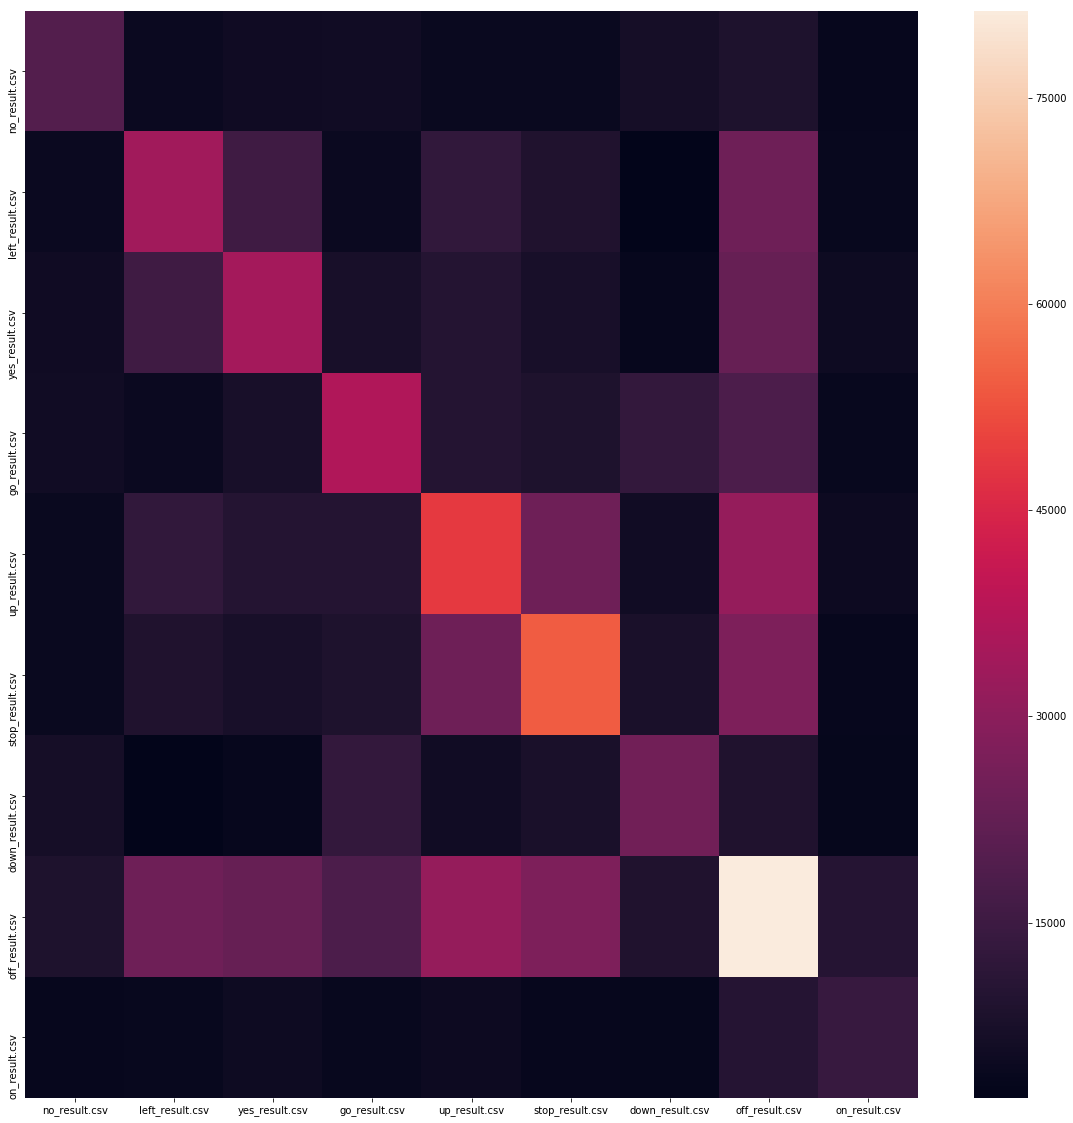

In [71]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(coocc)
plt.show()

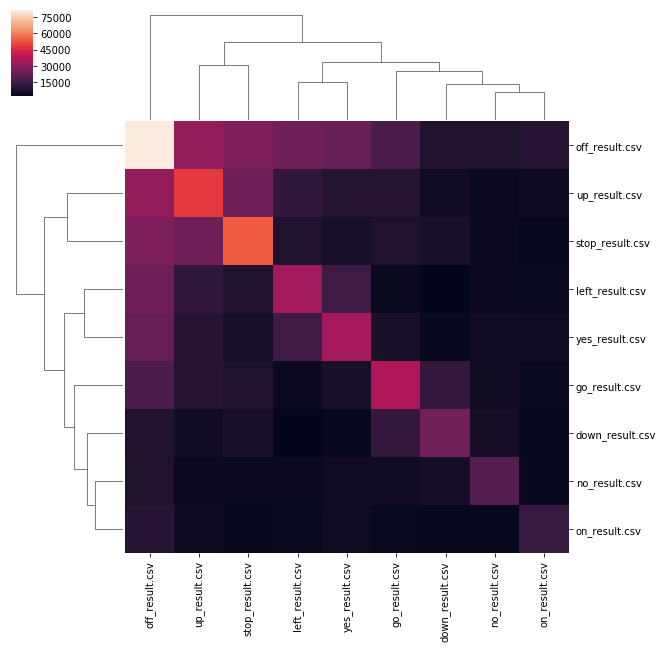

In [72]:
sns.clustermap(coocc)
plt.show()

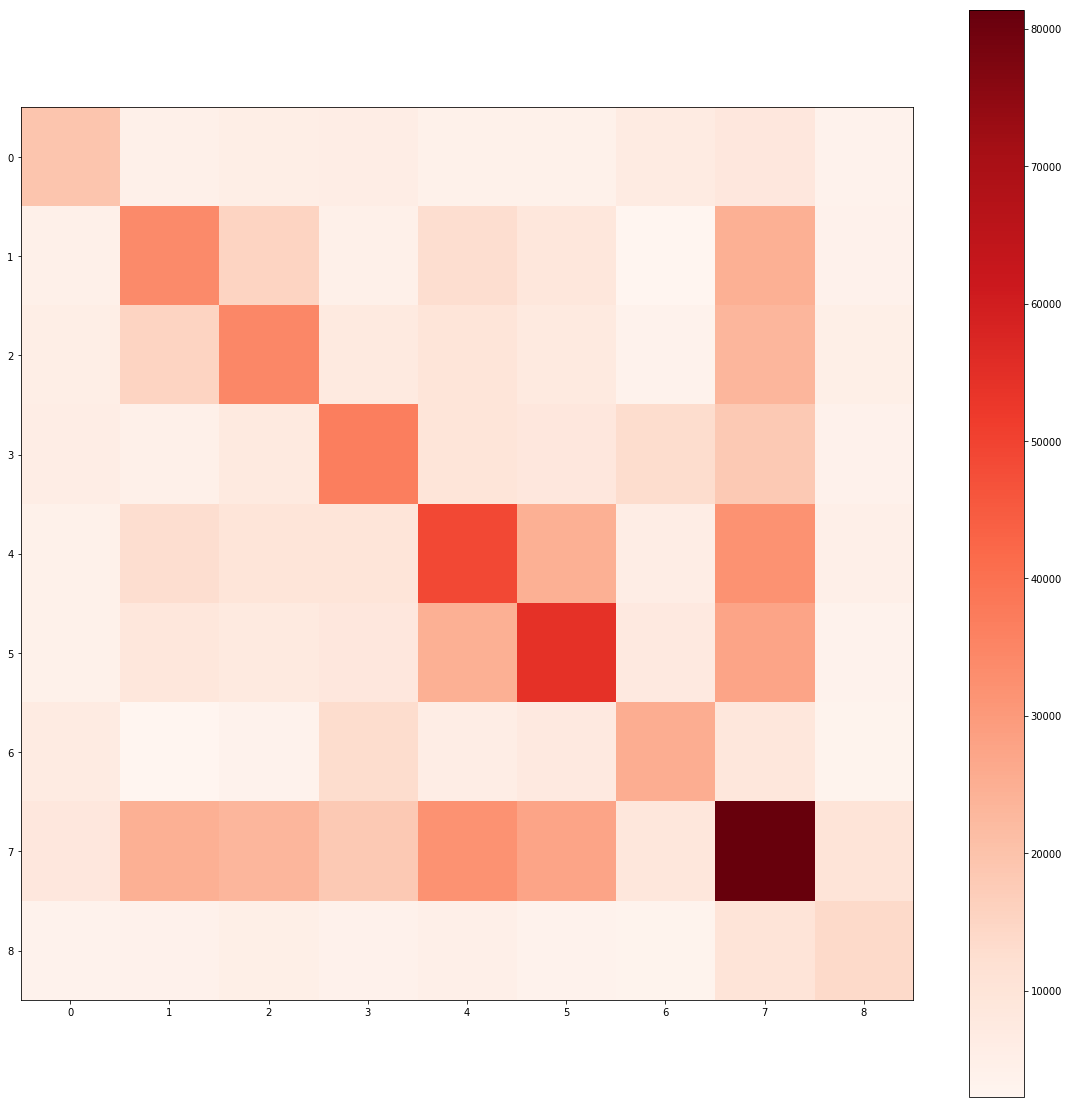

In [73]:
#plt.imshow(coocc,interpolation='nearest', cmap='Reds')
#plt.colorbar()
#plt.show()

In [75]:
df_silence= df.replace(['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence','unknown'],[0,0,0,0,0,0,0,0,0,0,1,0])
df_asint = df_silence.astype(int)
coocc_silence = df_asint.T.dot(df_asint)
print (coocc_silence)

                 no_result.csv  left_result.csv  yes_result.csv  \
no_result.csv             9854             9806            4715   
left_result.csv           9806            18855            4840   
yes_result.csv            4715             4840            8771   
go_result.csv             5579             5612            8228   
up_result.csv             9552            12494            4709   
stop_result.csv           9543            11102            4677   
down_result.csv           9557            13851            4984   
off_result.csv            6870             7388            4684   
on_result.csv             8958            10069            4866   

                 go_result.csv  up_result.csv  stop_result.csv  \
no_result.csv             5579           9552             9543   
left_result.csv           5612          12494            11102   
yes_result.csv            8228           4709             4677   
go_result.csv             9442           5554             5561   

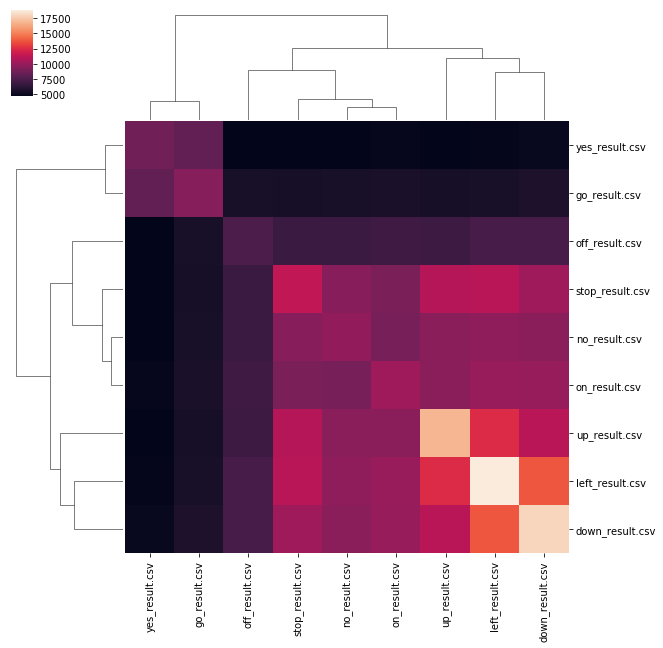

In [76]:
sns.clustermap(coocc_silence)
plt.show()

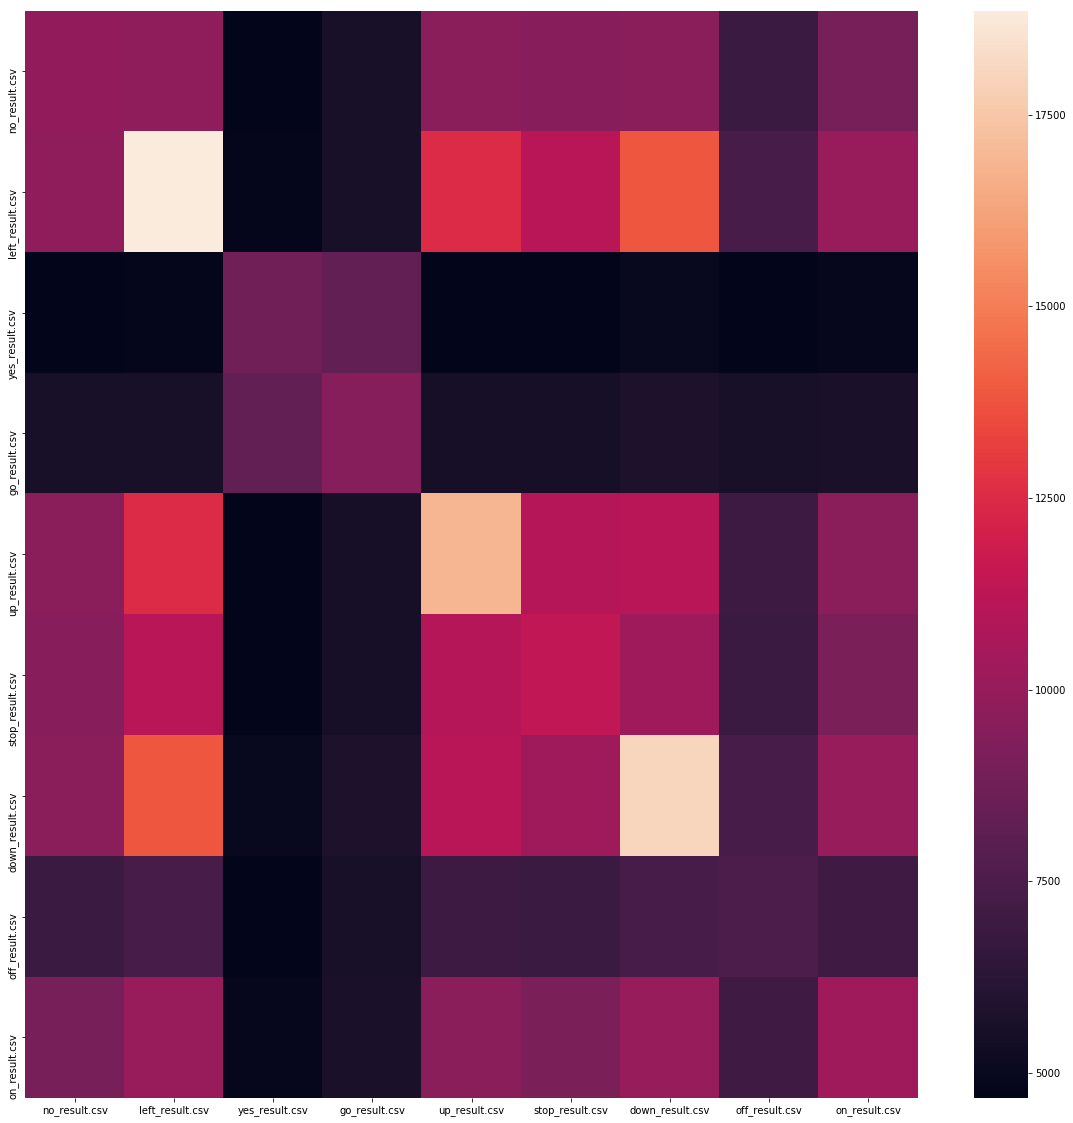

In [77]:
sns.heatmap(coocc_silence)
plt.show()

In [79]:
df_unknown= df.replace(['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence','unknown'],[0,0,0,0,0,0,0,0,0,0,0,1])
df_asint = df_unknown.astype(int)
coocc_unknown = df_asint.T.dot(df_asint)
print (coocc_unknown)

                 no_result.csv  left_result.csv  yes_result.csv  \
no_result.csv           129446            92223           97144   
left_result.csv          92223           105698           84752   
yes_result.csv           97144            84752          115346   
go_result.csv            98031            74572           85031   
up_result.csv            79282            72806           70564   
stop_result.csv          78626            65765           66421   
down_result.csv         103369            80386           83798   
off_result.csv           59007            58651           56863   
on_result.csv           118065            96776          102090   

                 go_result.csv  up_result.csv  stop_result.csv  \
no_result.csv            98031          79282            78626   
left_result.csv          74572          72806            65765   
yes_result.csv           85031          70564            66421   
go_result.csv           112380          70604            68447   

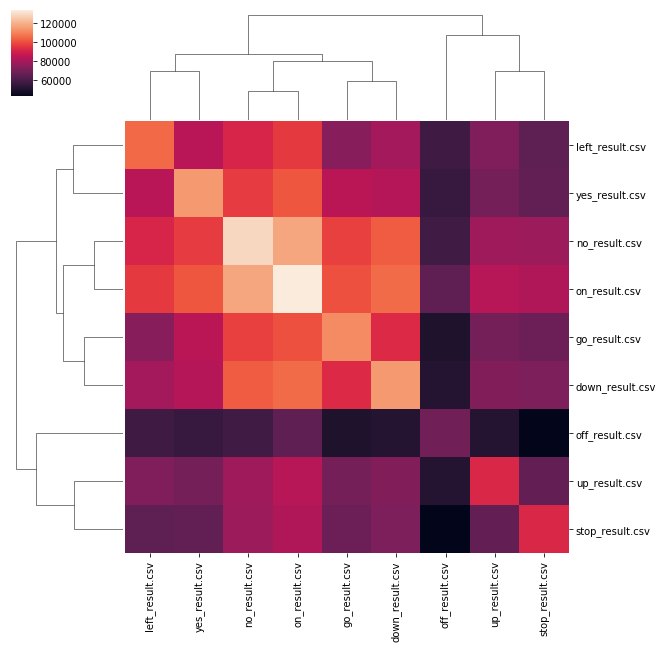

In [81]:
sns.clustermap(coocc_unknown)
plt.show()

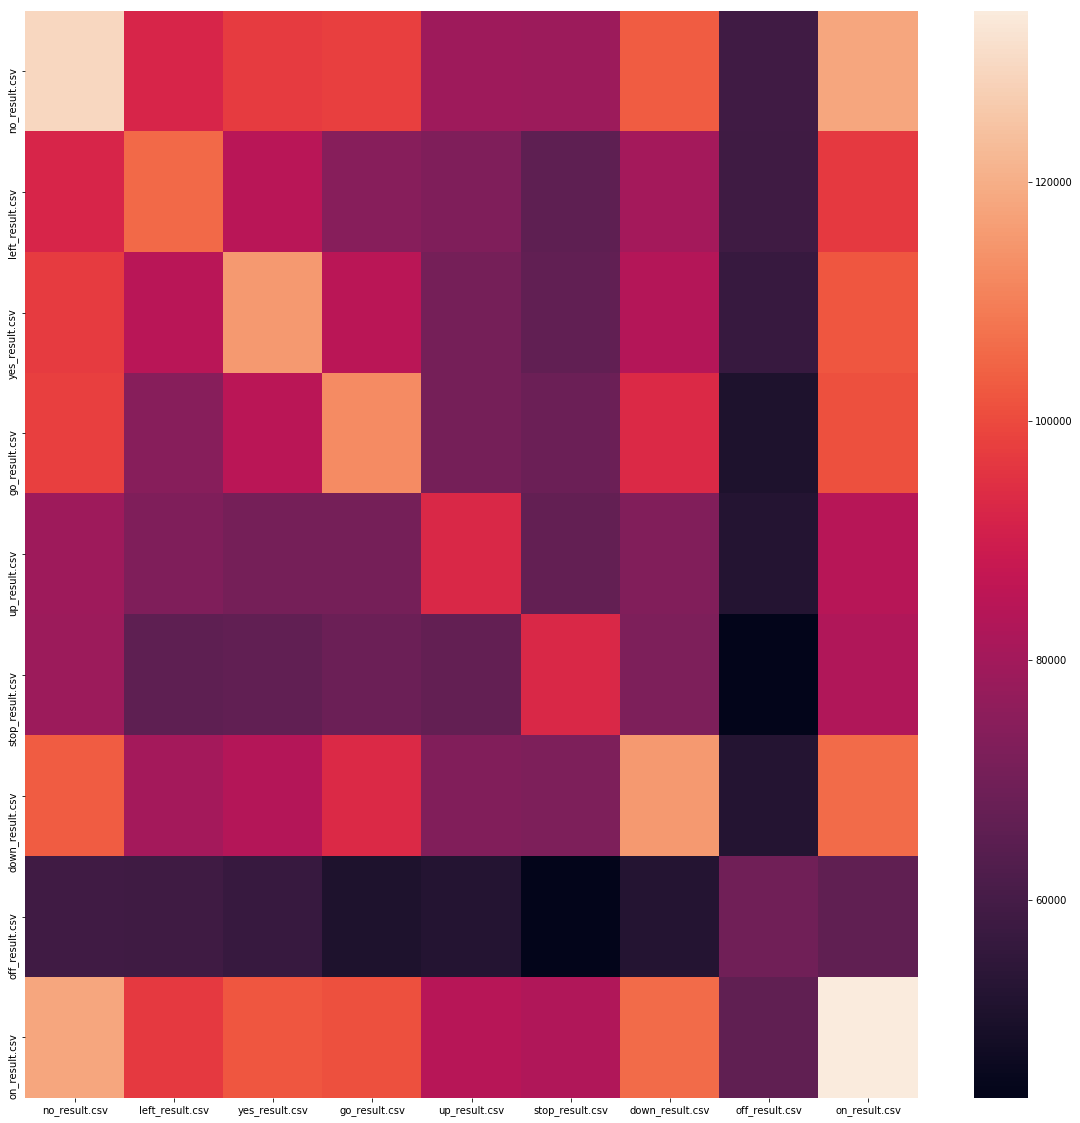

In [83]:
sns.heatmap(coocc_unknown)
plt.show()

In [ ]:
1) 먼저 silence 기준으로 레이블링 (left,down)이 relevent 하게 분류  하는 것으로 보여 이 기준으로 처리
2) no, on, go, down 순 각 레이블링 단독으로 나온 것 확정 처리
3) left, yes 여러 방면으로 레이블링 한 것 확률 확인하여 13000 부근의 count 가 나오는 방법 선택
4) 이후 up, stop 동일하게
5) off 너무 많은레이블링 나왔으므로 다른 방법들 다 처리 한 후 13000 부근의 나머지가 레이블링 되도록 (unknown 남길 수 있도록)